First 5 rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural      

/tmp/ipykernel_29695/1295586570.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace(categorical_mappings, inplace=True)


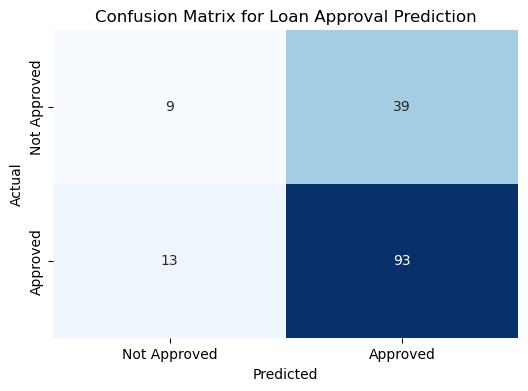

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
dataset = pd.read_csv("/home/primes/Documents/COOPERATIVE UNIVERSITY OF KENYA/4.1/MACHINE-LEARNING/loan_data_set.csv")

# Inspect the dataset
print("First 5 rows of the dataset:")
print(dataset.head())
print("\nDataset Summary:")
print(dataset.describe())
print("\nNull values in each column:")
print(dataset.isnull().sum())

# Fill missing values with mode (most frequent value) for categorical features
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    dataset[column] = dataset[column].fillna(dataset[column].mode()[0])

# Drop the 'Loan_ID' column as it does not contribute to prediction
dataset.drop('Loan_ID', axis=1, inplace=True)

# Encoding categorical variables for machine learning algorithms
categorical_mappings = {
    "Gender": {"Female": 0, "Male": 1},
    "Married": {"No": 0, "Yes": 1},
    "Education": {"Graduate": 0, "Not Graduate": 1},
    "Self_Employed": {"No": 0, "Yes": 1},
    "Property_Area": {"Urban": 0, "Rural": 1, "Semiurban": 2},
    "Loan_Status": {"N": 0, "Y": 1}
}

dataset.replace(categorical_mappings, inplace=True)
dataset['Dependents'] = dataset['Dependents'].replace('3+', 3).astype(int)

# Define features and target variable
X = dataset.drop('Loan_Status', axis=1)
y = dataset['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38, stratify=y)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluation: Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy of KNN model: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Approved", "Approved"], yticklabels=["Not Approved", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Loan Approval Prediction")
plt.show()
